# Requirements

In [1]:
#!pip install tensorflow keras

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for Bitcoin. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- symbol - the resource for prediction
- open - the open price of BTC
- high - the high price of BTC
- low - the low price of BTC
- volumeBTC - the volume of trades BTC
- volumeUSD - the volume of trades USD
- close - the close price of BTC

Target:
close

Load the dataset into a `pandas` data frame.

In [4]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('BTC-Daily.csv')
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [5]:
df.isnull().sum()

date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,
2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


Explore the dataset using visualizations of your choice.

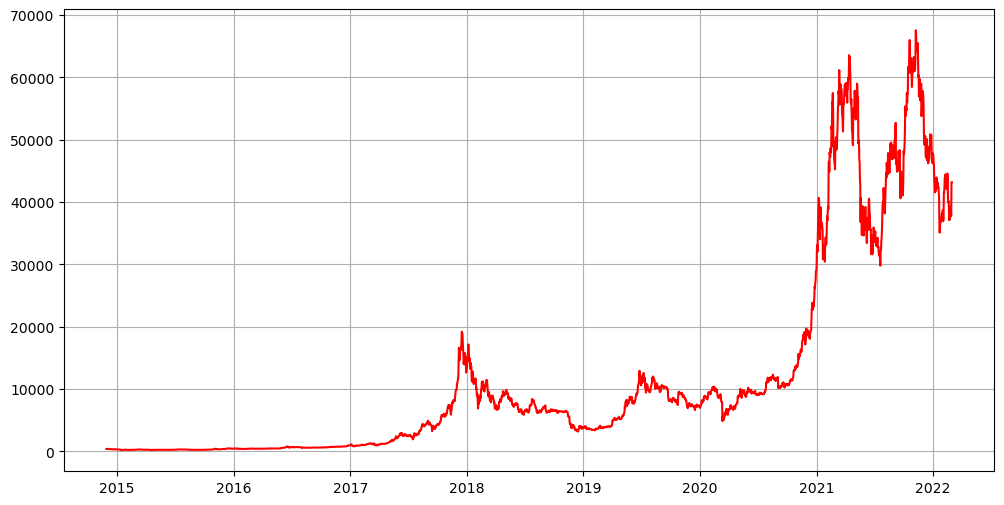

In [7]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], color='red')
plt.grid()
plt.show()

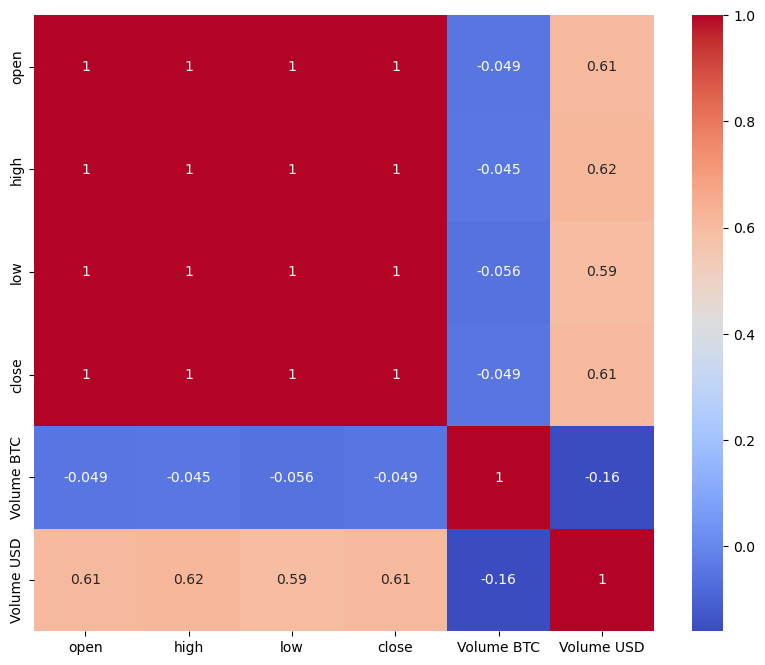

In [8]:
correlation = df.drop(columns=['symbol'],axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
correlation.corr()

,open,high,low,close,Volume BTC,Volume USD
open,1.000000,0.999485,0.998983,0.998798,-0.048598,0.609992
high,0.999485,1.000000,0.998901,0.999474,-0.045371,0.617662
low,0.998983,0.998901,1.000000,0.999319,-0.056040,0.593531
close,0.998798,0.999474,0.999319,1.000000,-0.049489,0.608673
Volume BTC,-0.048598,-0.045371,-0.056040,-0.049489,1.000000,-0.160242
Volume USD,0.609992,0.617662,0.593531,0.608673,-0.160242,1.000000


# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [10]:
# Write your code here. Add as many boxes as you need.
for lag in range(1,8):
        df[f'close_lag_{lag}'] = df['close'].shift(lag)
df.dropna(inplace=True)
df.head()

,symbol,open,high,low,close,Volume BTC,Volume USD,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7
date,,,,,,,,,,,,,,
2022-02-22,BTC/USD,37036.98,38463.88,36368.99,38269.94,2388.759035,9.141766e+07,37274.18,38376.88,39231.64,39146.66,37712.68,43178.98,43185.48
2022-02-21,BTC/USD,38384.09,39494.11,36810.72,37076.60,3501.420364,1.298208e+08,38269.94,37274.18,38376.88,39231.64,39146.66,37712.68,43178.98
2022-02-20,BTC/USD,40108.62,40151.62,37974.18,38373.90,1283.511547,4.925334e+07,37076.60,38269.94,37274.18,38376.88,39231.64,39146.66,37712.68
2022-02-19,BTC/USD,40008.75,40471.27,39587.08,40109.02,695.654296,2.790201e+07,38373.90,37076.60,38269.94,37274.18,38376.88,39231.64,39146.66
2022-02-18,BTC/USD,40532.66,40996.31,39450.00,39996.99,2212.714920,8.850194e+07,40109.02,38373.90,37076.60,38269.94,37274.18,38376.88,39231.64


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [11]:
df = df.drop(columns='symbol')

In [12]:
# Write your code here. Add as many boxes as you need.
X = df.drop(columns=['open','high','low','close','Volume BTC'])
y = df['close']

In [13]:
X

,Volume USD,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7
date,,,,,,,,
2022-02-22,9.141766e+07,37274.18,38376.88,39231.64,39146.66,37712.68,43178.98,43185.48
2022-02-21,1.298208e+08,38269.94,37274.18,38376.88,39231.64,39146.66,37712.68,43178.98
2022-02-20,4.925334e+07,37076.60,38269.94,37274.18,38376.88,39231.64,39146.66,37712.68
2022-02-19,2.790201e+07,38373.90,37076.60,38269.94,37274.18,38376.88,39231.64,39146.66
2022-02-18,8.850194e+07,40109.02,38373.90,37076.60,38269.94,37274.18,38376.88,39231.64
...,...,...,...,...,...,...,...,...
2014-12-02,6.832530e+03,376.67,365.20,374.95,375.07,376.87,364.61,350.49
2014-12-01,6.660560e+03,379.25,376.67,365.20,374.95,375.07,376.87,364.61
2014-11-30,3.046330e+03,378.39,379.25,376.67,365.20,374.95,375.07,376.87


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:
n = len(X_train.columns)
n

8

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [17]:
expected_size = X_train.shape[0] * 17 * 1
expected_size

35955

## Neural Networks

Create an LSTM model and train it using the `train` function.

In [18]:
# Write your code here. Add as many boxes as you need.
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
X_train_lstm = X_train.reshape(X_train.shape[0], 1, n)
X_test_lstm = X_test.reshape(X_test.shape[0], 1, n)

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1],X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1) 
])

F:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
history = model.fit(X_train_lstm, y_train, epochs=5, batch_size=32, validation_data=(X_test_lstm,y_test),verbose=1)

Epoch 1/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0755 - val_loss: 0.0068
Epoch 2/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 - val_loss: 7.4315e-04
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - val_loss: 6.8046e-04
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - val_loss: 4.1181e-04
Epoch 5/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_loss: 2.9724e-04


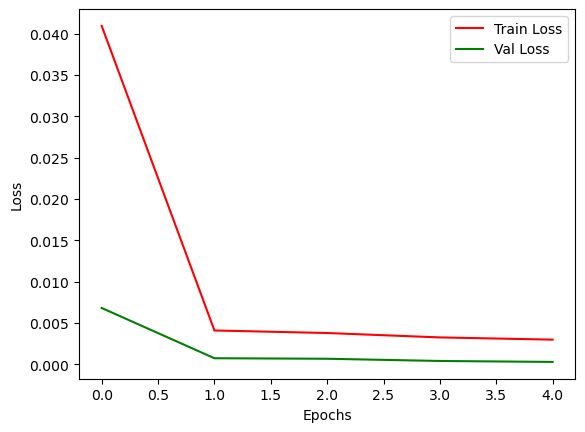

In [21]:
plt.plot(history.history['loss'], color='red',label='Train Loss')
plt.plot(history.history['val_loss'], color='green', label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Use the trained model to make predictions for the test set.

In [22]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test_lstm)
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [23]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Error: 1156.9795
Mean Squared Error: 1339127.4953
R2 Score: -203.5603


In [24]:
correlation = df.corr()
print(correlation['close'].sort_values(ascending=False))

close          1.000000
high           0.999472
low            0.999337
open           0.998813
close_lag_1    0.998812
close_lag_2    0.997707
close_lag_3    0.996617
close_lag_4    0.995479
close_lag_5    0.994244
close_lag_6    0.992954
close_lag_7    0.991609
Volume USD     0.610311
Volume BTC    -0.048400
Name: close, dtype: float64


# Additional Bonus Task

Group the data by month. You can use [pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) function.

Create an LSTM model to predict the 'close' price on a montly frequency.

In [25]:
monthly_data = df.groupby(pd.Grouper(freq='M')).mean()
monthly_data.head()

C:\Users\Beqir\AppData\Local\Temp\ipykernel_28612\167305431.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.groupby(pd.Grouper(freq='M')).mean()


,open,high,low,close,Volume BTC,Volume USD,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7
date,,,,,,,,,,,,,
2014-11-30,372.193333,383.310000,368.713333,375.446667,2.370867e+06,6302.890000,376.150000,376.993333,378.103333,373.706667,372.273333,371.740000,375.630000
2014-12-31,343.688387,348.636452,336.454194,341.813548,2.890151e+06,8538.789677,339.810968,337.787097,334.862581,331.618065,328.451935,325.281935,322.053871
2015-01-31,250.943226,260.632903,238.363871,247.703871,5.431845e+06,23554.290645,244.429355,241.895806,240.003548,238.790000,236.860968,235.121613,233.567097
2015-02-28,233.012500,239.859643,226.930357,234.278214,1.906693e+06,8128.418929,235.742857,237.029643,238.874286,240.403929,242.432500,244.231786,245.909643
2015-03-31,268.984516,274.261613,261.617419,268.596774,2.456041e+06,9173.153548,268.279677,267.607419,266.794194,266.265806,265.836774,265.274516,264.592581


In [26]:
X_monthly = monthly_data.drop(columns=['open','high','low','close','Volume BTC','Volume USD'])
y_monthly = monthly_data['close']
X_monthly

,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7
date,,,,,,,
2014-11-30,376.150000,376.993333,378.103333,373.706667,372.273333,371.740000,375.630000
2014-12-31,339.810968,337.787097,334.862581,331.618065,328.451935,325.281935,322.053871
2015-01-31,244.429355,241.895806,240.003548,238.790000,236.860968,235.121613,233.567097
2015-02-28,235.742857,237.029643,238.874286,240.403929,242.432500,244.231786,245.909643
2015-03-31,268.279677,267.607419,266.794194,266.265806,265.836774,265.274516,264.592581
...,...,...,...,...,...,...,...
2021-10-31,58328.484839,58830.878387,59304.903871,59698.939677,60006.382258,60206.274194,60513.125806
2021-11-30,60583.118667,60359.384000,60053.149667,59645.740333,59260.117333,58893.869333,58471.446667
2021-12-31,49022.730645,48726.029355,48490.422903,48380.262581,48185.829677,47945.268387,47651.989032


In [27]:
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_monthly, y_monthly
                                                                                   , test_size= 0.2, shuffle=False)

In [28]:
scaler_m = MinMaxScaler()
scaler_my = MinMaxScaler()
X_train_monthly = scaler_m.fit_transform(X_train_monthly)
X_test_monthly = scaler_m.transform(X_test_monthly)
y_train_monthly = scaler_my.fit_transform(y_train_monthly.values.reshape(-1, 1))
y_test_monthly = scaler_y.transform(y_test_monthly.values.reshape(-1, 1))

In [29]:
X_train_lstm_monthly = X_train_monthly.reshape(X_train_monthly.shape[0], 1, -1)
X_test_lstm_monthly = X_test_monthly.reshape(X_test_monthly.shape[0], 1, -1)

In [30]:
model_monthly = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm_monthly.shape[1], X_train_lstm_monthly.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1)
])

F:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model_monthly.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
history_monthly = model_monthly.fit(
    X_train_lstm_monthly, y_train_monthly,
    epochs=5, batch_size=32, validation_data=(X_test_lstm_monthly, y_test_monthly), verbose=1
)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - loss: 0.1551 - val_loss: 0.3169
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1417 - val_loss: 0.2535
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1411 - val_loss: 0.1947
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1243 - val_loss: 0.1391
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1185 - val_loss: 0.0887


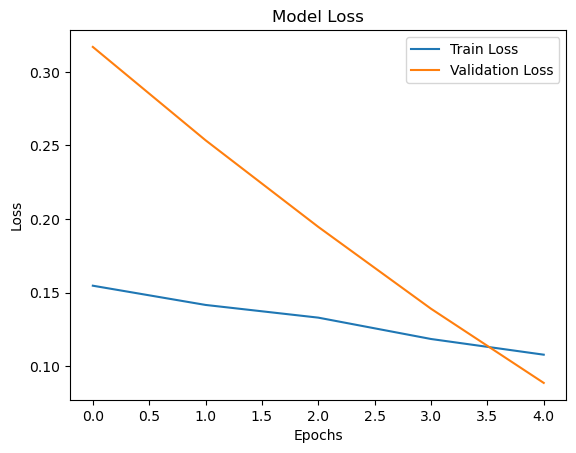

In [33]:
plt.plot(history_monthly.history['loss'], label='Train Loss')
plt.plot(history_monthly.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
y_pred_monthly = model_monthly.predict(X_test_lstm_monthly)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


In [35]:
mae_monthly = mean_absolute_error(y_test_monthly, y_pred_monthly)
mse_monthly = mean_squared_error(y_test_monthly, y_pred_monthly)
r2_monthly = r2_score(y_test_monthly, y_pred_monthly)

print(f"Monthly Prediction - MAE: {mae_monthly:.4f}")
print(f"Monthly Prediction - MSE: {mse_monthly:.4f}")
print(f"Monthly Prediction - R2 Score: {r2_monthly:.4f}")

Monthly Prediction - MAE: 0.2642
Monthly Prediction - MSE: 0.0887
Monthly Prediction - R2 Score: -0.7563
